## Creating a movie from MRI data 

The data used here is from https://braincatalogue.org 

 ## Install packages 
     wget    - Get the data from the Brain Catalogue URL
     nibabel - Open nifty files 
     dipy    - tool to reslice the MRI matrix

In [1]:
# Install pip packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install nibabel
!{sys.executable} -m pip install dipy
!{sys.executable} -m pip install ffmpeg

In [2]:
#Import packages to plot figure and write to video. 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter

## Import MRI data from Brain Catalogue

In [3]:
import wget
MRI_file_url = 'https://braincatalogue.org/data/Bottlenose_dolphin/MRI-n4.nii.gz'
MRI_file_name = wget.download(MRI_file_url)

## Read the MRI data 

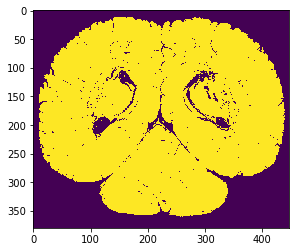

In [4]:
import os
import nibabel as nib
MRI = nib.load(MRI_file_name)
data = MRI.get_fdata()

data1 = np.rot90(data, 1, (1,0)) # Rotate image into correct axis 
plt.imshow(data1[:,:,100]>110) #plot image

## Reslice the MRI data to make a smoother movie
To write a movie at 60fps we need more frames so easy solution is just to interpolate in the z-axis.  

In [5]:
import dipy
from dipy.align.reslice import reslice

affine = MRI.affine
zooms = (1, 1, 1) # voxel size for x,y,z
new_zooms = (1,1,0.073) #new voxel size for x,y,z
data2, affine2 = dipy.align.reslice.reslice(data1, affine, zooms, new_zooms)

## Create and save movie

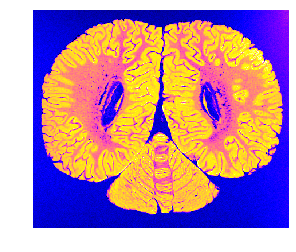

In [6]:
fig = plt.figure()
plt.axis('off')
ims = []
#2320 1320
for i in range(2100,1200,-1): #range(start, stop, step)
    
    im = plt.imshow(data2[:,:,i],animated = True)
    im.set_cmap('gnuplot2') #gnuplot
    ims.append([im])
     
ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True)
ani.save("MRI_Brain.mp4", fps=60)
    
    